In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# FMNIST 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train = x_train / 255.0
x_test = x_test / 255.0
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Sequential 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','categorical_accuracy'])
model.summary()

# 모델 학습
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

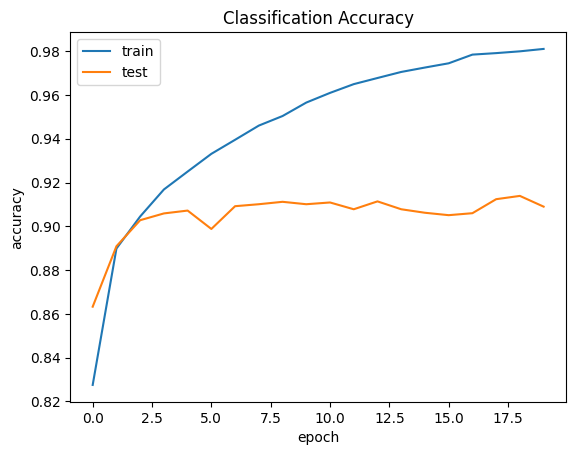

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

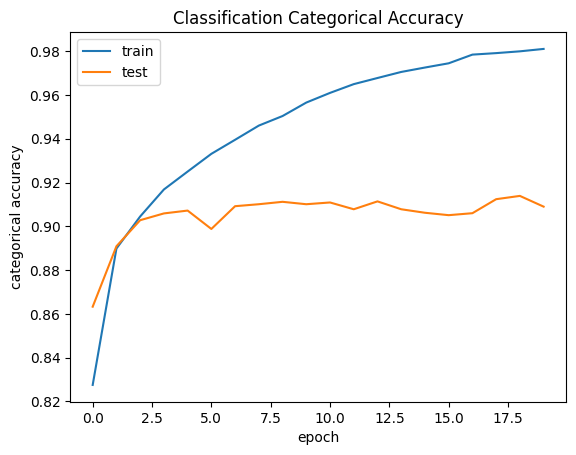

In [8]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Classification Categorical Accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

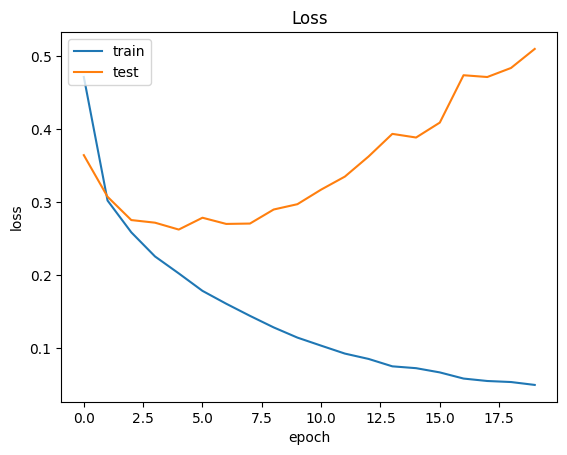

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# CIFAR10 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Functional 모델 정의
inputs = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy'])
model.summary()

# 모델 학습
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


170498071/170498071 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                            

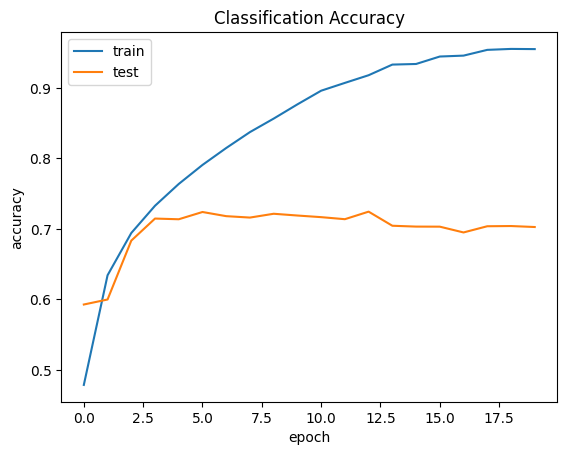

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

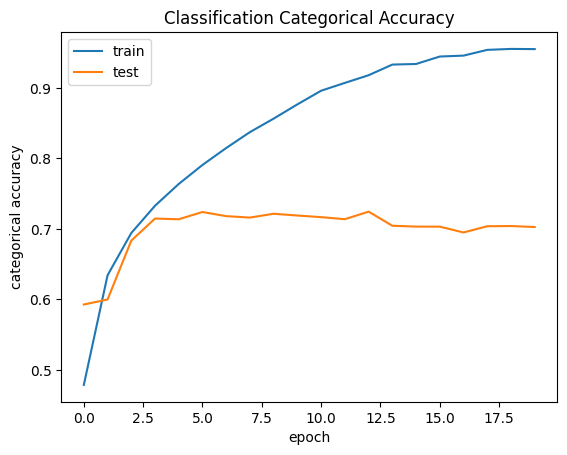

In [13]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Classification Categorical Accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

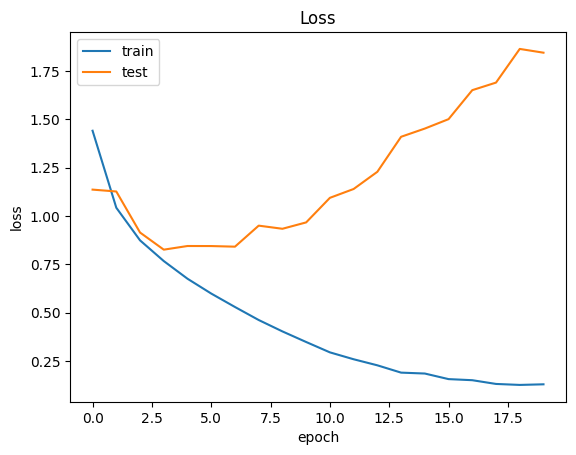

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# CIFAR10 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# ResNet50 모델 불러오기 (동결 지점 설정 가능)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# 동결 지점 설정
freeze_point = 143
for layer in base_model.layers[:freeze_point]:
    layer.trainable = False

# 완전 연결 레이어 추가
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

# 전이 학습 모델 정의
model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','categorical_accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 52s 27ms/step - loss: 1.7786 - accuracy: 0.3742 - categorical_accuracy: 0.3742 - val_loss: 5.8183 - val_accuracy: 0.1008 - val_categorical_accuracy: 0.1008
Epoch 2/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5681 - accuracy: 0.4507 - categorical_accuracy: 0.4507 - val_loss: 4.0865 - val_accuracy: 0.1460 - val_categorical_accuracy: 0.1460
Epoch 3/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4837 - accuracy: 0.4784 - categorical_accuracy: 0.4784 - val_loss: 4.4213 - val_accuracy: 0.1536 - val_categorical_accuracy: 0.1536
Epoch 4/20
1563/1563 [==============================] - 40s 25ms/step - loss: 1.4279 - accuracy: 0.5005 - categorical_accuracy: 0.5005 - val_loss: 2.9309 - val_accuracy: 0.2118 - val_categorical_accuracy: 0.2118
Epoch 5/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3876 - accuracy: 0.5141 - categorical_accuracy: 0.5141 - val_loss: 4.143

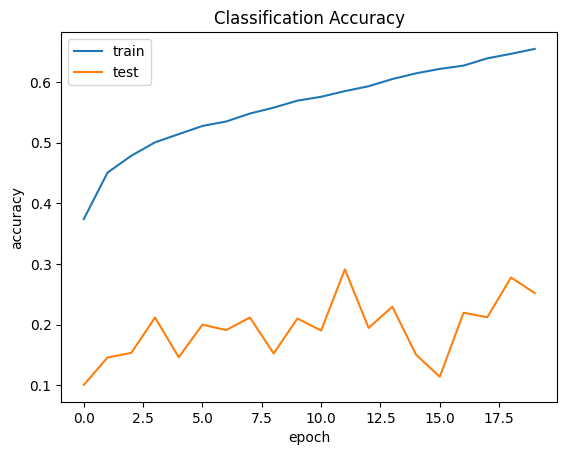

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

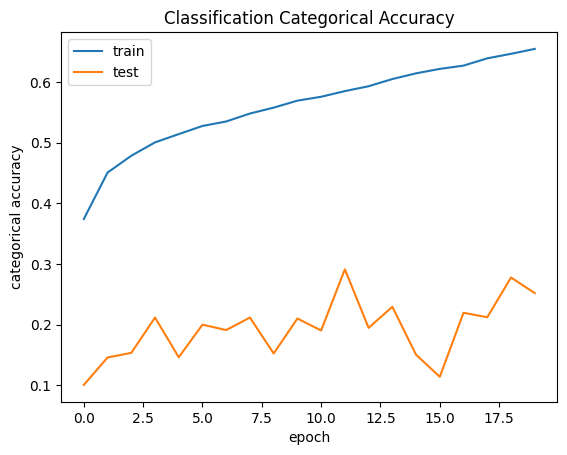

In [26]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Classification Categorical Accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

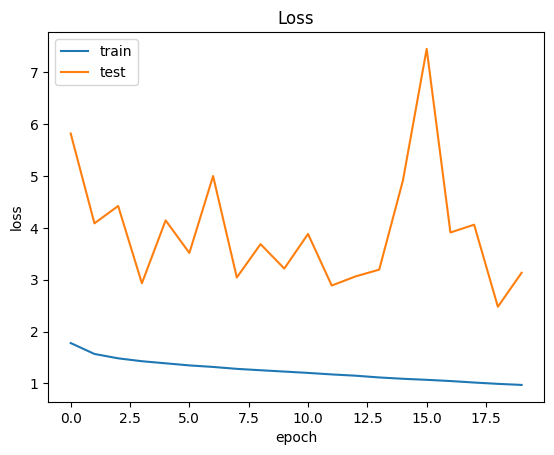

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# CIFAR10 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# ResNet50 모델 불러오기 (동결 지점 설정 가능)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 완전 연결 레이어 추가
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

# 전이 학습 모델 정의
model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','categorical_accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 109s 45ms/step - loss: 1.3699 - accuracy: 0.5361 - categorical_accuracy: 0.5361 - val_loss: 1.3147 - val_accuracy: 0.5679 - val_categorical_accuracy: 0.5679
Epoch 2/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9913 - accuracy: 0.6719 - categorical_accuracy: 0.6719 - val_loss: 1.4550 - val_accuracy: 0.5505 - val_categorical_accuracy: 0.5505
Epoch 3/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8371 - accuracy: 0.7242 - categorical_accuracy: 0.7242 - val_loss: 0.9949 - val_accuracy: 0.6865 - val_categorical_accuracy: 0.6865
Epoch 4/20
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7267 - accuracy: 0.7612 - categorical_accuracy: 0.7612 - val_loss: 0.9197 - val_accuracy: 0.7120 - val_categorical_accuracy: 0.7120
Epoch 5/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6252 - accuracy: 0.7964 - categorical_accuracy: 0.7964 - val_loss: 0.87

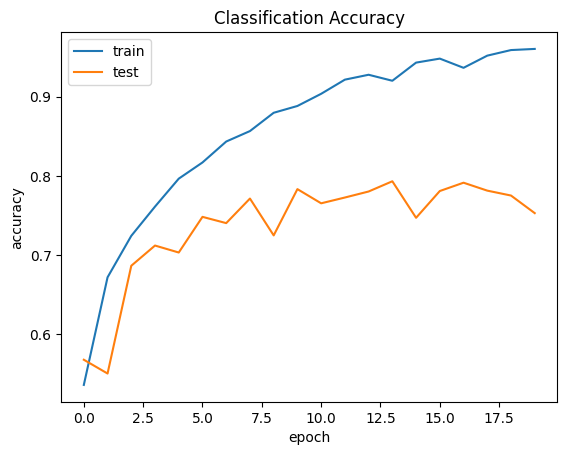

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

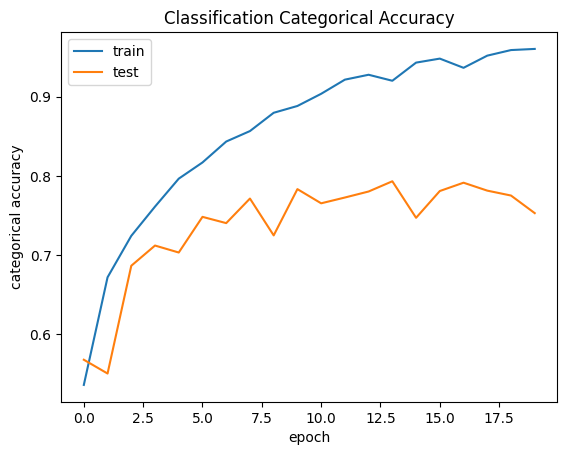

In [30]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Classification Categorical Accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

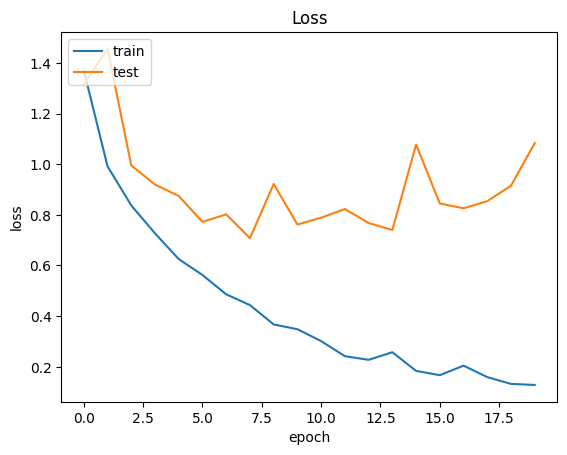

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()